In [1]:
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import time
import sklearn
import pickle
import shap

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


from sklearn.metrics import accuracy_score, roc_auc_score, plot_confusion_matrix, plot_roc_curve, precision_score, recall_score, f1_score, roc_auc_score

<a id="0"></a> <br>
# Table of contents
1. [Introduction](#1)     
1. [Data import and initial checks](#2)
1. [Initial Data Cleaning](#3)
1. [Exploratory Data Analysis](#4) 
1. [Correlation](#5) 
1. [Data preparation](#6)     
    1. [Feature encoding](#7)
    1. [Train/ test split](#8)
1. [Modeling](#9)
    1. [Logistic regression](#10)
    1. [Random forest](#11)
    1. [Adaptive Boosting Classifier (AdaBoost)](#12)
    1. [Decision Tree](#13)
    1. [XG Boost](#14)
    1. [KNN](#15)
    1. [Support Vector Classifier (SVC)](#16)
    1. [LGBM](#17)
1. [Comparing the model performance](#18)
1. [Executing the algorithm on the test dataset](#19)
1. [Packaging the model](#20)
1. [Model Explainability using SHAP](#21)
1. [Conclusion](#22)
1. [References](#23)

## Introduction <a id="1"></a> <br>

Customer satisfaction with airlines has been steadily climbing over the past few years. For many, this problem has been given greater attention in recent years, with the air travel industry restarting after a grinding halt brought about by the COVID-19 pandemic. However, this is a problem that carriers have been facing for years before the pandemic. Uncomfortable seats, crowded flights, delays, and sub-standard amenities are complaints that customers have been airing in recent times.

Customer satisfaction is something that more and more carriers are paying attention to and trying to improve. Excellent customer service, especially against your competitors is key for marketability, sales, and customer retention. Inversely — poor customer service ratings can lead to customer attrition and a poor company reputation. 

The aim of this project is to identify the factors that most influences customer satisfaction and verify them through machine learning.

This project was assembled in a Python 3.9 environment using Jupyter Notebooks. The Pandas, Numpy, Seaborn, and Matplotlib libraries were used for exploratory analysis. XGBoost, Lightgbm and Scikit-Learn were used to create the modelling pipelines and obtain metrics.

The datasets used for this project come from Kaggle.com. Out of the 25 features, 14 of them are survey entries where passengers gave a rating from 0 to 5 for a particular service offered. The target column is overall “satisfaction” which has the values satisfied or neutral or dissatisfied. We consider this as a binary variable with: satisfied (43.3% of the survey results); neutral or dissatisfied (56.7% of the survey results).

## Data import and initial checks <a id="2"></a> <br>

The dataset contains an airline passenger satisfaction survey.  The following classification problem is set: It is necessary to predict which of the two levels of satisfaction with the airline the passenger belongs to:

- Satisfaction
- Neutral or dissatisfied

Content:

- Gender: Gender of the passengers (Female, Male) 
- Customer Type: The customer type (Loyal customer, disloyal customer)
- Age: The actual age of the passengers
- Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)
- Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
- Flight distance: The flight distance of this journey
- Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable; 1-5)
- Departure/Arrival time convenient: Satisfaction level of departure/arrival time convenient
- Ease of Online booking: Satisfaction level of online booking
- Gate location: Satisfaction level of gate location
- Food and drink: Satisfaction level of Food and drink
- Online boarding: Satisfaction level of online boarding
- Seat comfort: Satisfaction level of seat comfort
- Inflight entertainment: Satisfaction level of inflight entertainment
- On-board service: Satisfaction level of on-board service
- Leg room service: Satisfaction level of leg room service
- Baggage handling: Satisfaction level of baggage handling
- Check-in service: Satisfaction level of check-in service
- Inflight service: Satisfaction level of inflight service
- Cleanliness: Satisfaction level of Cleanliness
- Departure Delay in Minutes: Minutes delayed when departure
- Arrival Delay in Minutes: Minutes delayed when Arrival
- Satisfaction: Airline satisfaction level (Satisfaction, neutral or dissatisfaction)

In [3]:
airplane_traindata = pd.read_csv('data/train.csv')
print("The shape of the dataset is:", airplane_traindata.shape)

The shape of the dataset is: (103904, 25)


In [4]:
airplane_testdata = pd.read_csv('data/test.csv')
print("The shape of the dataset is:", airplane_testdata.shape)

The shape of the dataset is: (25976, 25)


In [5]:
airplane_traindata

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [6]:
airplane_traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

* Train Dataset contains 18 int type columns.
* Train Dataset contains 1 float type columns.
* Train Dataset contain 5 object type column.

In [7]:
airplane_traindata.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

Only arrival time delay has null values.

In [8]:
airplane_testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

* Test Dataset contains 18 int type columns.
* Test Dataset contains 1 float type columns.
* Test Dataset contain 5 object type column.

In [9]:
airplane_testdata.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


Again only column arrival delay in minutes contains null values.

### Initial Data Cleaning <a id="3"></a> <br>

- Replacing the spaces in the column names with underscore
- Unnecessary columns: The columns Unnamed: 0 and id are of no use to us, so they can be dropped
- In the training dataset, there are 310 missing values in the column (Arrival Delay in Minutes). We can observe 83 values missing in the test set in this same column. Since we cannot accurately decide whether or not a null value indicates that the trip was not delayed, we will fill this with the mean value of the column.
- There is a data type mismatch in the delay columns. The arrival column is of a float datatype while the departure column is a whole integer datatype. Regardless of whether or not necessary, I will match the two datatypes as floats for consistency when performing further analyses.


In [10]:
def clean_data(df):
    # 1. Replacing the spaces in the column names with underscore
    df.columns = [c.replace(' ', '_') for c in df.columns]
    # 2. Dropping the unnecessary columns
    df.drop(['Unnamed:_0', 'id'], axis = 1, inplace = True)
    # 3. Filling the null values
    df["Arrival_Delay_in_Minutes"].fillna(df["Arrival_Delay_in_Minutes"].mean(),inplace=True)
    # 4. Uniformizing datatype in delay column
    df['Departure_Delay_in_Minutes'] = df['Departure_Delay_in_Minutes'].astype(float)
    return df


In [11]:
clean_data(airplane_traindata)
clean_data(airplane_testdata)

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50.0,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0.0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0.0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0.0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0.0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,4,3,2,4,4,5,4,0.0,0.0,neutral or dissatisfied
25972,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,4,5,5,5,5,4,0.0,0.0,satisfied
25973,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,4,3,4,5,4,2,0.0,0.0,neutral or dissatisfied
25974,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,4,3,2,5,4,5,4,0.0,0.0,satisfied


In [12]:
airplane_traindata.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,103904.0,39.379706,15.114964,7.0,27.0,40.0,51.0,85.0
Flight_Distance,103904.0,1189.448375,997.147281,31.0,414.0,843.0,1743.0,4983.0
Inflight_wifi_service,103904.0,2.729683,1.327829,0.0,2.0,3.0,4.0,5.0
Departure/Arrival_time_convenient,103904.0,3.060296,1.525075,0.0,2.0,3.0,4.0,5.0
Ease_of_Online_booking,103904.0,2.756901,1.398929,0.0,2.0,3.0,4.0,5.0
Gate_location,103904.0,2.976883,1.277621,0.0,2.0,3.0,4.0,5.0
Food_and_drink,103904.0,3.202129,1.329533,0.0,2.0,3.0,4.0,5.0
Online_boarding,103904.0,3.250375,1.349509,0.0,2.0,3.0,4.0,5.0
Seat_comfort,103904.0,3.439396,1.319088,0.0,2.0,4.0,5.0,5.0
Inflight_entertainment,103904.0,3.358158,1.332991,0.0,2.0,4.0,4.0,5.0


In [13]:
airplane_testdata.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,25976.0,39.620958,15.135685,7.0,27.0,40.0,51.0,85.0
Flight_Distance,25976.0,1193.788459,998.683999,31.0,414.0,849.0,1744.0,4983.0
Inflight_wifi_service,25976.0,2.724746,1.335384,0.0,2.0,3.0,4.0,5.0
Departure/Arrival_time_convenient,25976.0,3.046812,1.533371,0.0,2.0,3.0,4.0,5.0
Ease_of_Online_booking,25976.0,2.756775,1.412951,0.0,2.0,3.0,4.0,5.0
Gate_location,25976.0,2.977094,1.282133,1.0,2.0,3.0,4.0,5.0
Food_and_drink,25976.0,3.215353,1.331506,0.0,2.0,3.0,4.0,5.0
Online_boarding,25976.0,3.261665,1.355536,0.0,2.0,4.0,4.0,5.0
Seat_comfort,25976.0,3.449222,1.320090,1.0,2.0,4.0,5.0,5.0
Inflight_entertainment,25976.0,3.357753,1.338299,0.0,2.0,4.0,4.0,5.0


I would divide the features in different groups which I would use during the EDA.

In [15]:
categorical_col, continuous_col, object_col =[],[], []  #creating three categories for column distribution
def categorical_continuous_columns(data):   #defining a function
    for col in data.columns:   #for loop to check for all column in data.columns
        if data[col].value_counts().count() < 7 and data[col].dtype != object :  #cheking if varieties are less than 7 and the dtype is different from object
            categorical_col.append(col)         #if condition is true column will add into categorical_col
        elif data[col].value_counts().count() < 7 and data[col].dtype == object : #cheking if varieties are less than 7 and the dtype is object
            object_col.append(col)
        else:
            continuous_col.append(col)          #if above condition is false col will add in continuous_col
    return categorical_col,continuous_col, object_col

Applying the function created to the train dataset.

In [16]:
categorical_col,continuous_col, object_col = categorical_continuous_columns(airplane_traindata)

I would remove the feature 'satisfaction' as I would review it separately.

In [17]:
object_col.remove("satisfaction")

### Exploratory Data Analysis <a id="4"></a> <br>

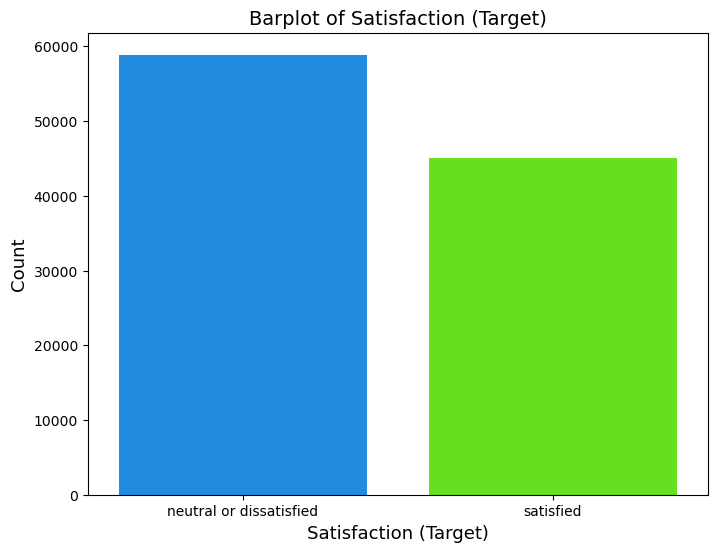

In [18]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='satisfaction', data=airplane_traindata, palette='gist_rainbow_r')
plt.title('Barplot of Satisfaction (Target)', fontsize=14)
plt.xlabel('Satisfaction (Target)', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.show()

The prediction columns are not completely even, however, I would say that the data is quite balanced and it does not require any special resampling methods to be implemented.

Next, I would review the spread of responses across the dataset.

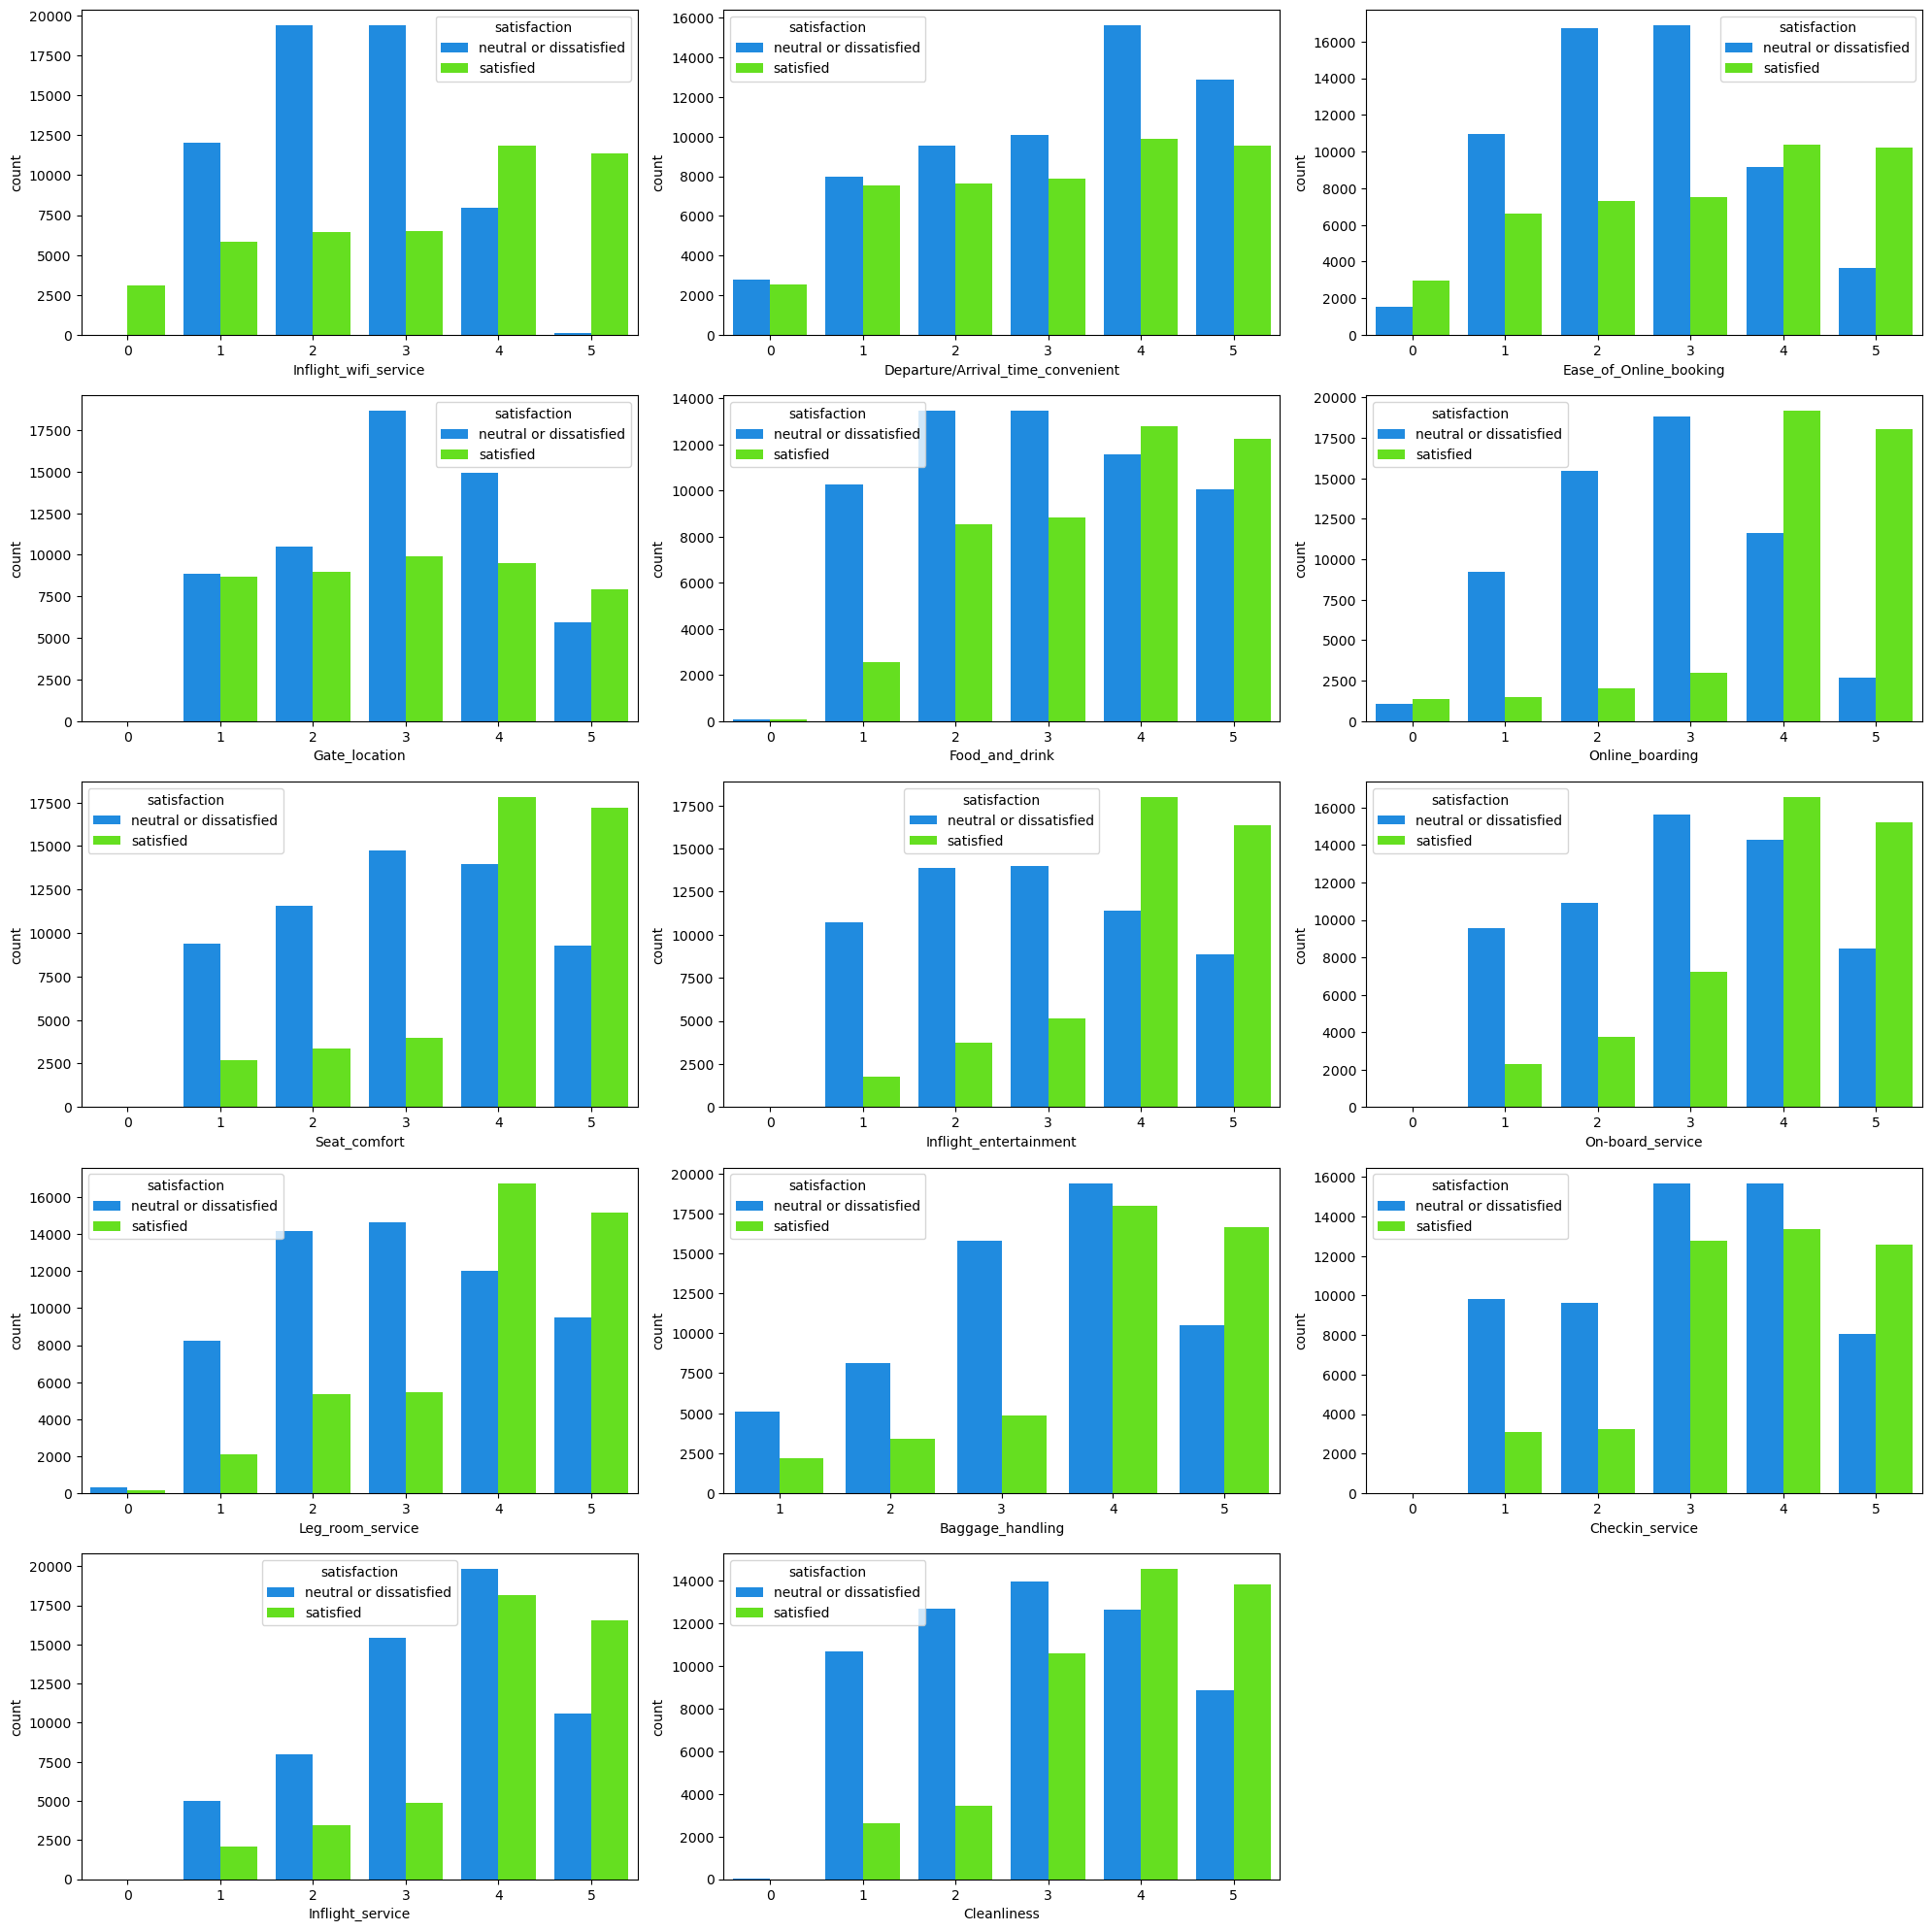

In [19]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(categorical_col):
    plt.subplot(5, 3, i+1)
    sns.countplot(x=col, data=airplane_traindata, hue = 'satisfaction', palette='gist_rainbow_r')
plt.tight_layout()
plt.show()

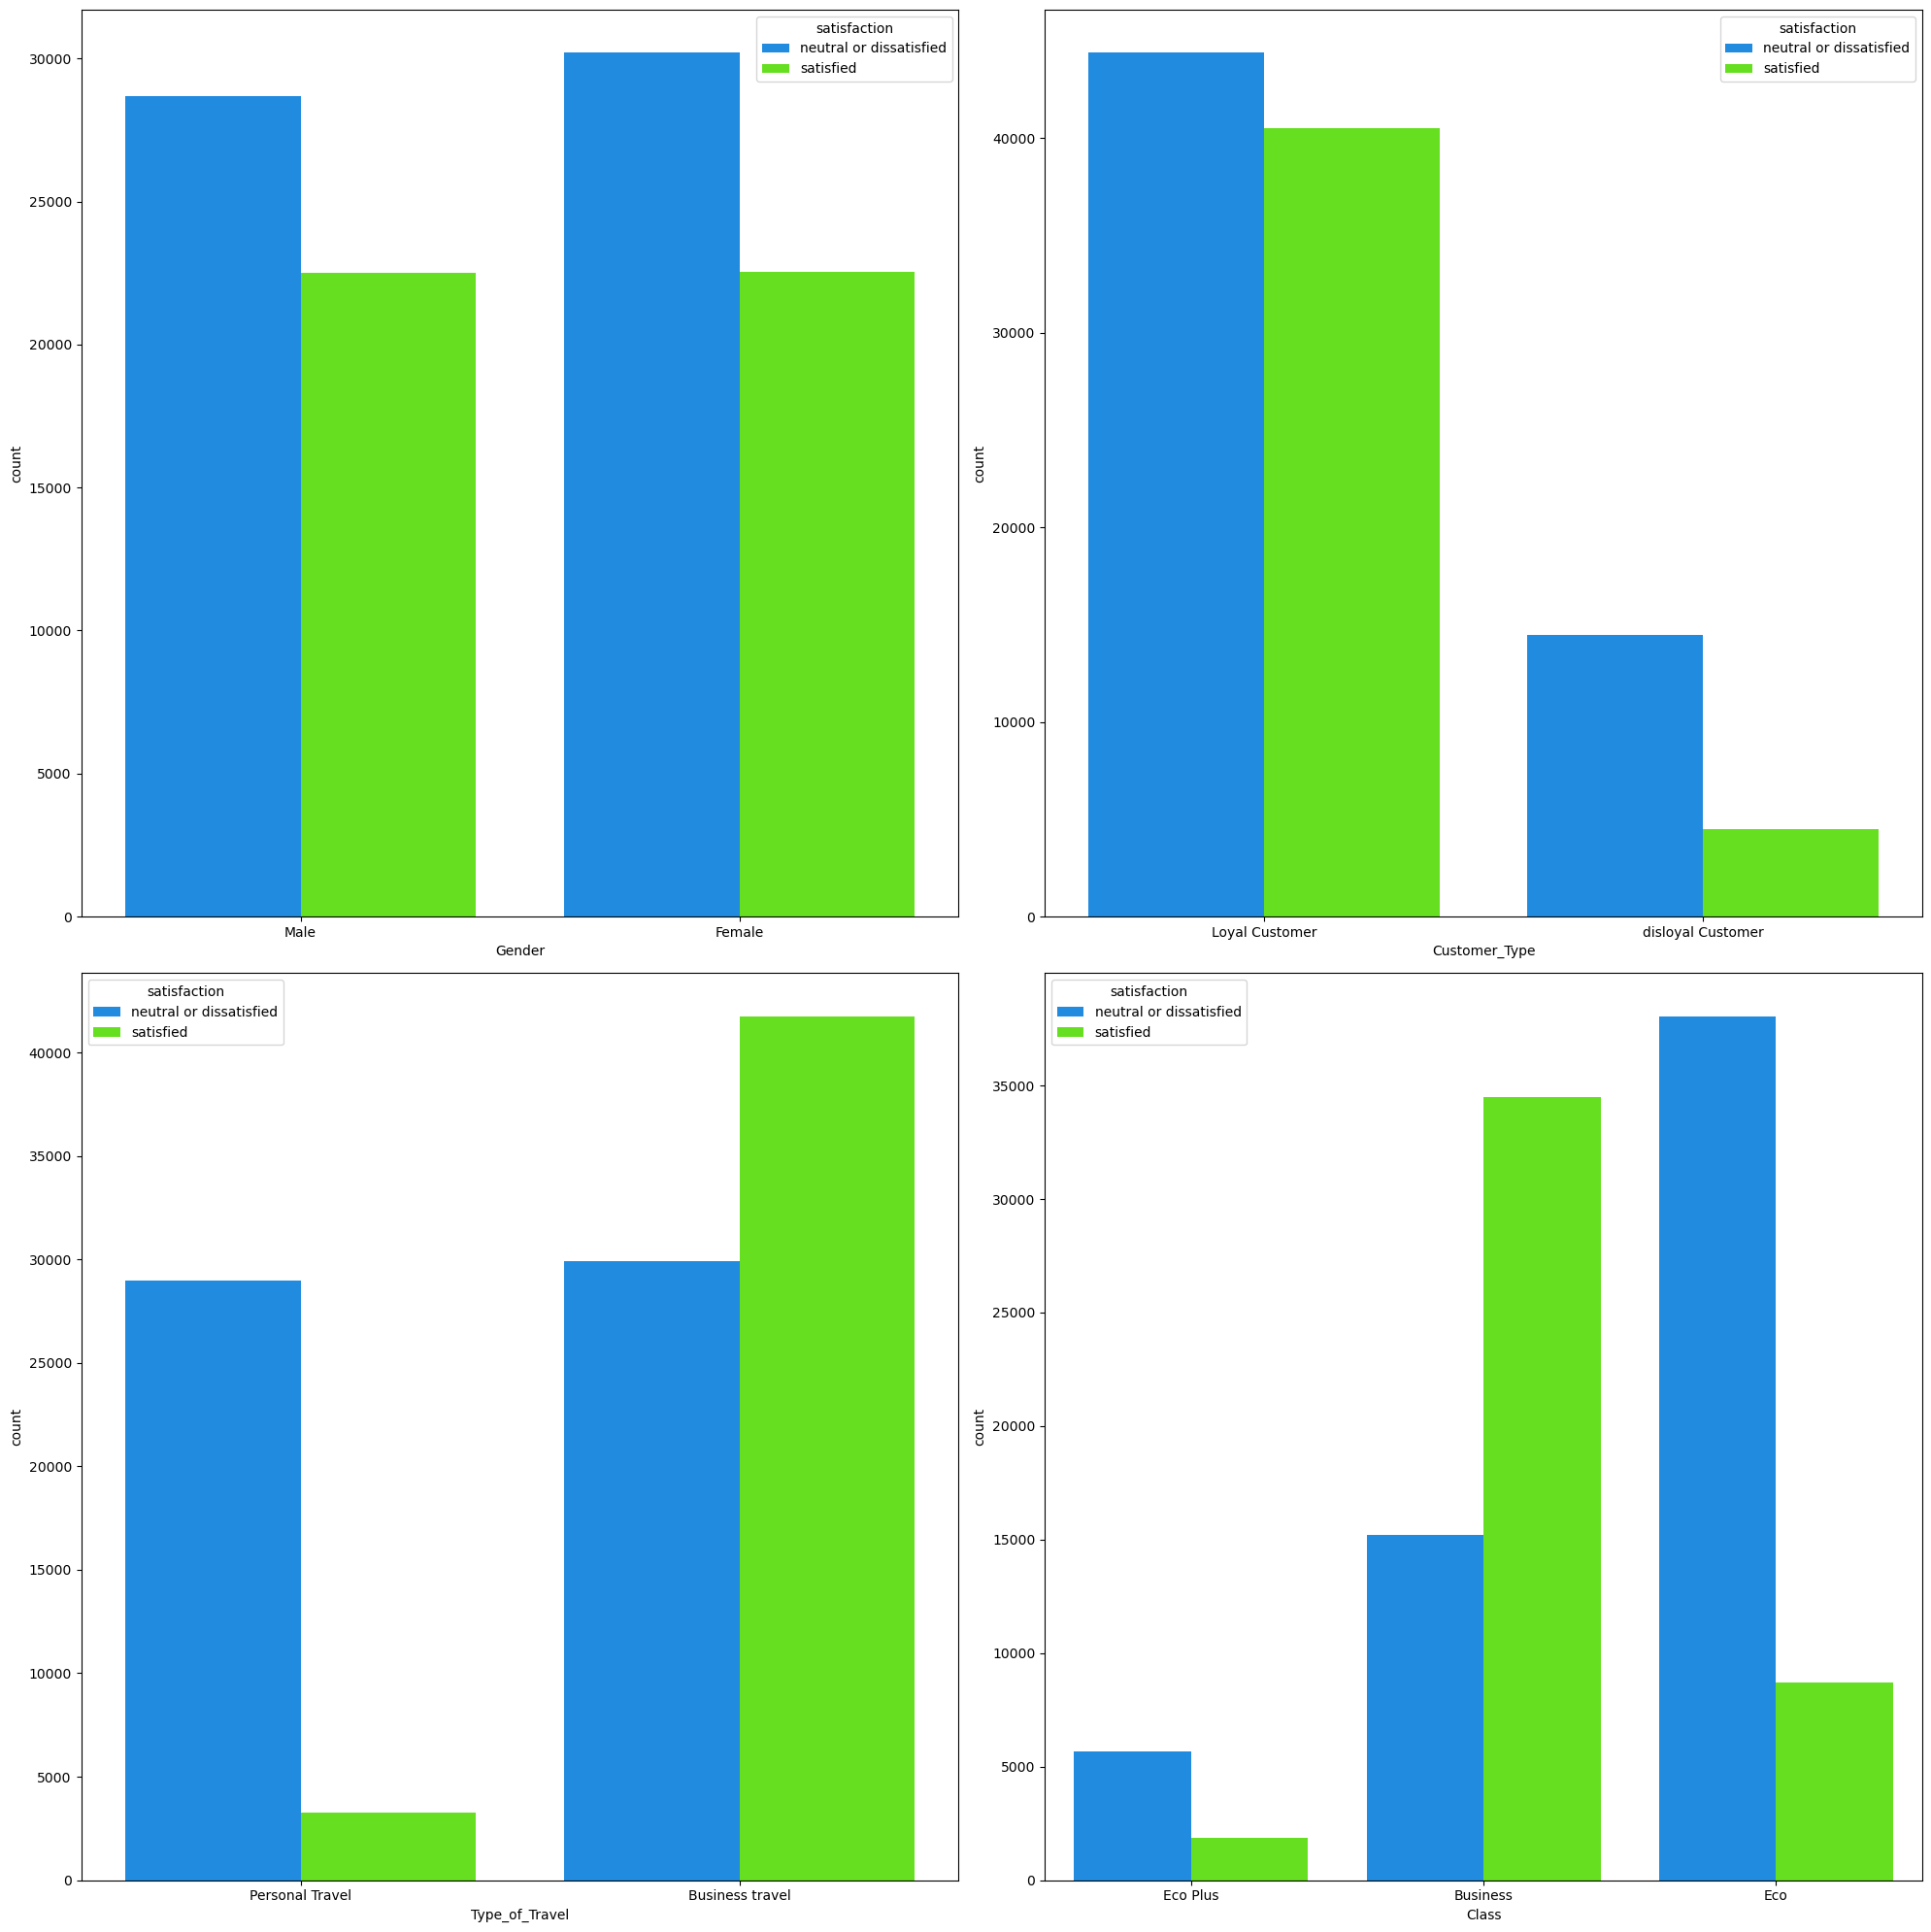

In [20]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(object_col):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=col, data=airplane_traindata, hue = 'satisfaction', palette='gist_rainbow_r')
plt.tight_layout()
plt.show()

- It is observed that gender distribution of neutral/dissatisfied and satisfied customers are similar. For both male and female passengers, number of neutral/dissatisfied customers are on the higher when compared to number of satisfied customers.
- Loyalty customers outweigh non-loyalty customers dramatically. However, among both groups - dissatisfied customers make up the majority class.
-  Passengers travelling for business seem far more likely to be satisfied with the experience of their trip than those who travel for personal reasons.
- Passengers who travel in a business class cabin are far more likely to finish their trip with a positive impression than are those who fly in economy or economy plus/premium economy.

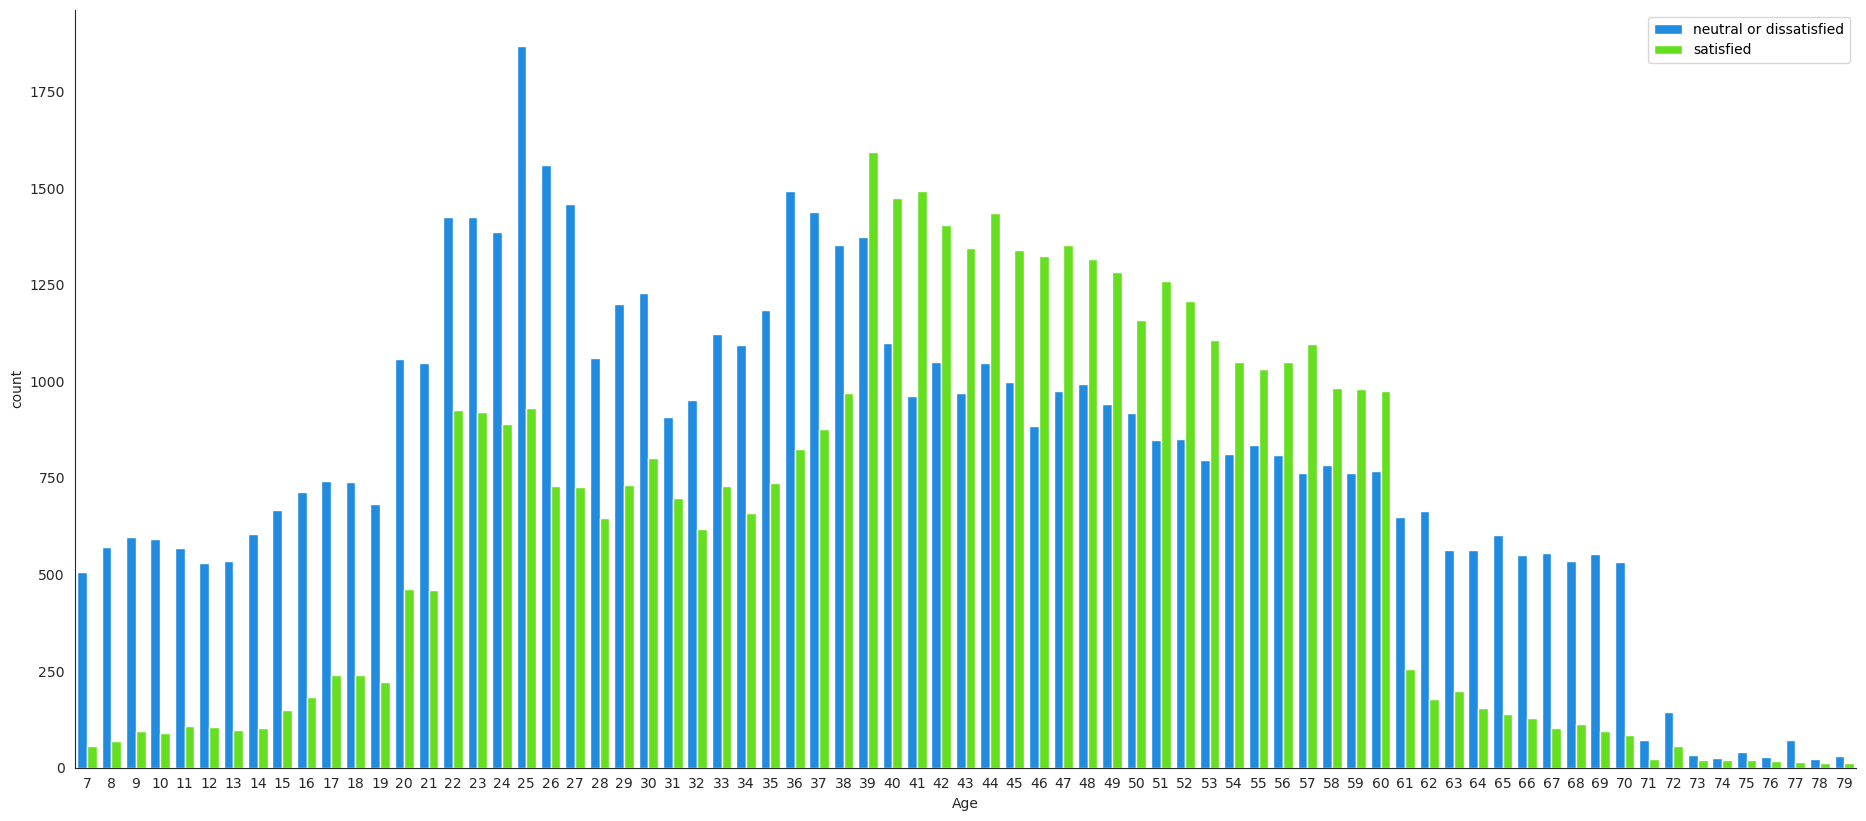

In [21]:
# Countplot comparing age to satisfaction
with sns.axes_style('white'):
    g = sns.catplot(x = 'Age', data = airplane_traindata,  
                    kind = 'count', hue = 'satisfaction', order = range(7, 80),
                    height = 8.27, aspect=18.7/8.27, legend = False,
                   palette = 'gist_rainbow_r')
    
plt.legend(loc='upper right');

From age 7-to-38 and from age 61-to-79, the number of neutral/dissatisfied passengers is very high compared to satisfied passengers. On the other hand, in age group 39-60, the number of satisfied passengers is higher compared to neutral/dissatisfied passengers.

(0.0, 1000.0)

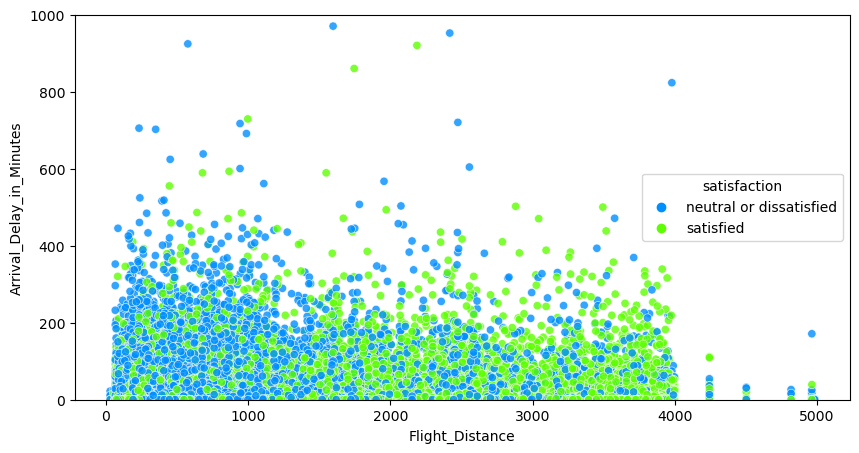

In [22]:
plt.figure(figsize=(10,5), dpi=100)
sns.scatterplot(data=airplane_traindata,x='Flight_Distance',y='Arrival_Delay_in_Minutes',hue='satisfaction',palette='gist_rainbow_r', alpha=0.8)
plt.ylim(0,1000)

The most important takeaway here is the longer the flight distance, most passengers are fine with a slight delay in arriva, which is a strange finding from this plot! So arrival delay is less of a factor for a long distance flight, comparitively, however, short distance travellers does not seem to be excited about the arrival delays, which also makes sense.

<AxesSubplot:xlabel='Arrival_Delay_in_Minutes', ylabel='Departure_Delay_in_Minutes'>

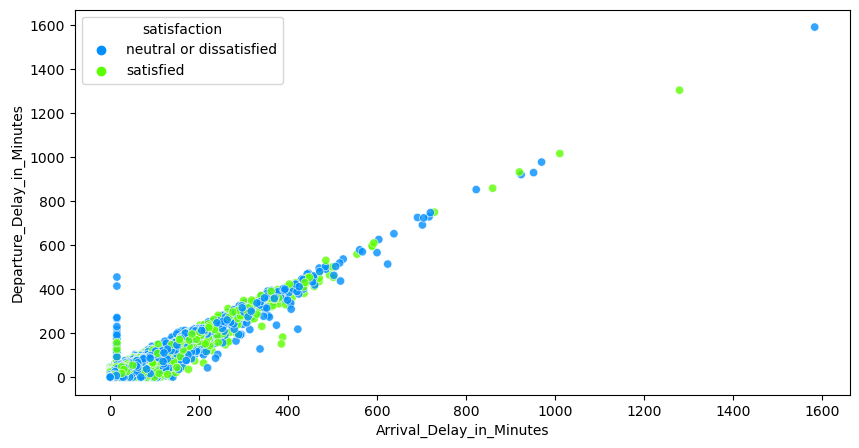

In [23]:
plt.figure(figsize=(10,5), dpi=100)
sns.scatterplot(data=airplane_traindata,x='Arrival_Delay_in_Minutes',y='Departure_Delay_in_Minutes',hue='satisfaction',palette='gist_rainbow_r', alpha=0.8)

The arrival and departure delay seems to have a linear relationship, which makes complete sense.

## Correlation <a id="5"></a> <br>

<AxesSubplot:>

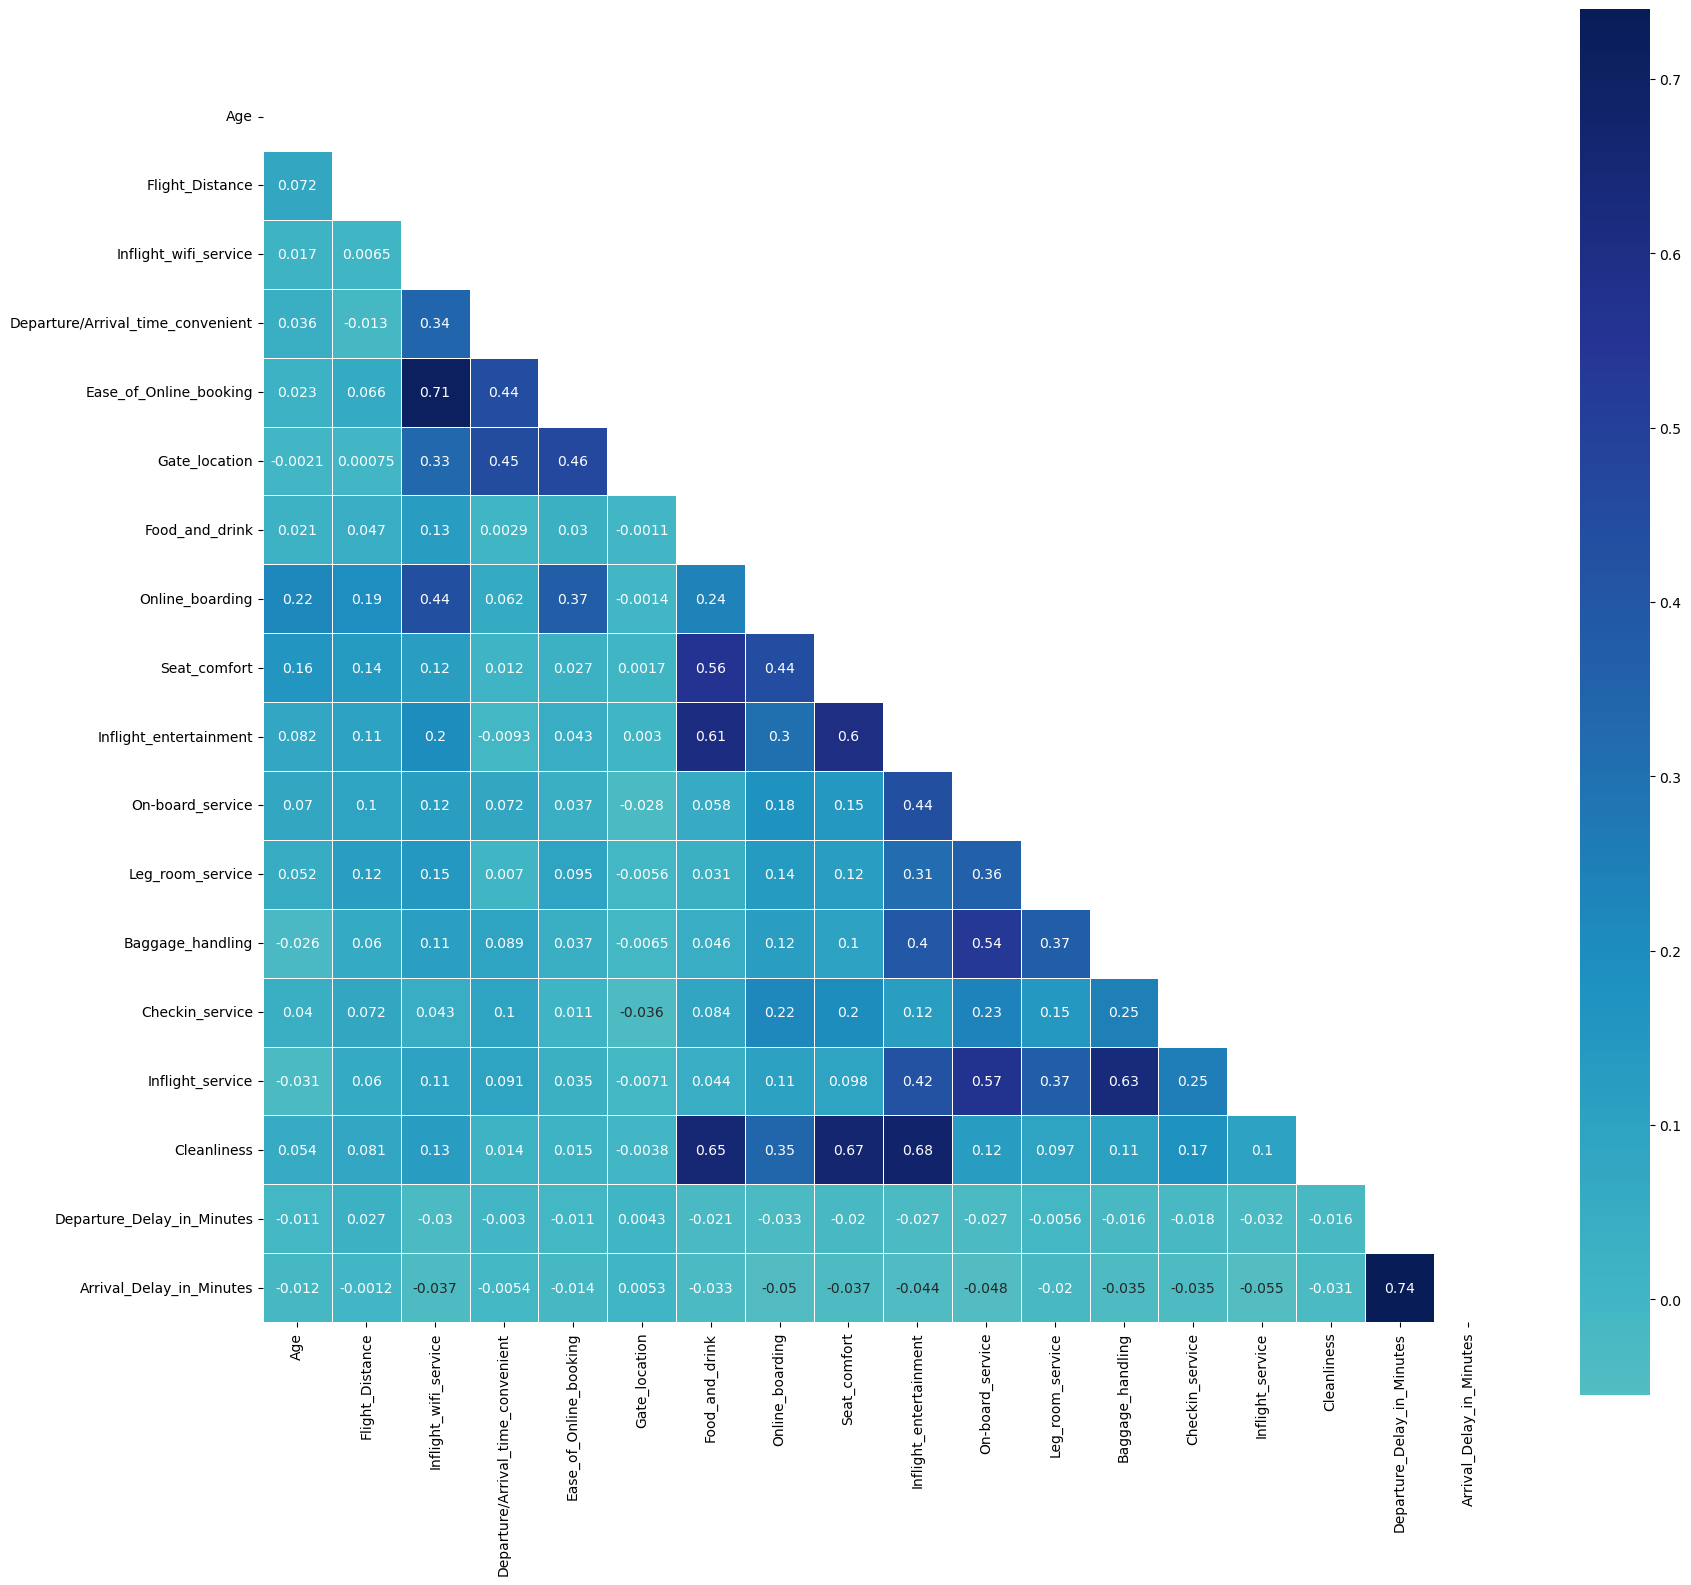

In [24]:
corr = airplane_traindata.corr(method='spearman')
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 18))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot = True, mask=mask, cmap="YlGnBu", center=0,
            square=True, linewidths=.5)

"Ease_of_Online_booking" is highly correlated with "Inflight_wifi_service" and "Inflight_service" is highly correlated with "Baggage_handling".  
"Arrival_Delay_in_Minutes" is highly correlated with "Departure_Delay_in_Minutes".  
"Cleanliness" is highly correlated with "Food_and_Drink", "Seat_comfort" and "Inflight_entertainment".  
However, no pair is having corrrelation coefficient exactly equal to 1. Therefore there is no perfect multi-collinearity. Hence we are not discarding any variable.

## Data preparation <a id="6"></a> <br>

### Feature encoding <a id="7"></a> <br>

Before ingesting the data into the model, the data had to be encoded to be ready for modeling.

In [25]:
encoder = LabelEncoder()

In [26]:
for col in airplane_traindata.columns:
    if airplane_traindata[col].dtypes=="object":
        airplane_traindata[col]=encoder.fit_transform(airplane_traindata[col])

In [27]:
for col in airplane_testdata.columns:
    if airplane_testdata[col].dtypes=="object":
        airplane_testdata[col]=encoder.fit_transform(airplane_testdata[col])

### Train/test split <a id="8"></a> <br>

I would split the training data to train and validation datasets.

In [28]:
airplane_attributes_train = airplane_traindata.drop(["satisfaction"],axis=1) #input data to model except result "satisfaction"
airplane_labels_train = airplane_traindata["satisfaction"]   #satisfaction is prediction
x_train,x_val,y_train,y_val = train_test_split(airplane_attributes_train, airplane_labels_train ,test_size=0.20)#defining train and test_size
airplane_attributes_test = airplane_testdata.drop(["satisfaction"],axis=1)
airplane_labels_test = airplane_testdata["satisfaction"]

I would use the StandardScaler from sklearn to scale the data.

In [29]:
# scale = StandardScaler()
scale = MinMaxScaler()

In [30]:
x_train = scale.fit_transform(x_train)
x_val = scale.fit_transform(x_val)
x_test = scale.fit_transform(airplane_attributes_test)

In [31]:
y_test = airplane_labels_test

In [32]:
x_train.shape,x_val.shape,x_test.shape,y_train.shape,y_val.shape,y_test.shape

((83123, 22), (20781, 22), (25976, 22), (83123,), (20781,), (25976,))

In [33]:
def get_model_metrics(model, X_train, X_test, y_train, y_test):
   
    '''
    Model activation function, takes in model as a parameter and returns metrics as specified.
    
    Inputs: 
        model,  X_train, y_train, X_test, y_test
    
    Output: 
        Model output metrics, confusion matrix, ROC AUC curve
    '''
    plt.rcParams["figure.figsize"] = (5,5)
    
    # Mark of current time when model began running
    t0 = time.time()
    
    # Fit the model on the training data and run predictions on test data
    model.fit(X_train,  y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:,1]
    # Obtain training accuracy as a comparative metric using Sklearn's metrics package
    train_score = model.score(X_train, y_train)
    # Obtain testing accuracy as a comparative metric using Sklearn's metrics package
    accuracy = accuracy_score(y_test, y_pred)
    # Obtain precision from predictions using Sklearn's metrics package
    precision = precision_score(y_test, y_pred)
    # Obtain recall from predictions using Sklearn's metrics package
    recall = recall_score(y_test, y_pred)
    # Obtain f1 from predictions using Sklearn's metrics package
    f1 = f1_score(y_test, y_pred)
    # Obtain ROC score from predictions using Sklearn's metrics package
    roc = roc_auc_score(y_test, y_pred_proba)
    # Obtain the time taken used to run the model, by subtracting the start time from the current time
    time_taken = time.time() - t0

    # Outputting the metrics of the model performance
    print("Accuracy on Training = {:.3f}".format(train_score))
    print("Accuracy on Test = {:.3f} • Precision = {:.3f}".format(accuracy, precision))
    print("Recall = {:.3f}".format(recall))
    print("F1 = {:.3f} • ROC Area under Curve = {:.3f}".format(f1, roc))

    # Plotting the confusion matrix of the model's predictive capabilities
    plot_confusion_matrix(model, X_test, y_test, cmap = plt.cm.Blues)
    # Plotting the ROC AUC curve of the model 
    plot_roc_curve(model, X_test, y_test)    
    plt.show()
    
    return model, train_score, accuracy, precision, recall, f1, roc, time_taken

## Modeling <a id="9"></a> <br>

I chose 8 algorithms which are commonly used for classification tasks which I would execute on my data and I would compare their performance. The algorithms which I would apply are:
* Logistic Regression
* Random Forest
* Decision Tree
* KNN
* Support Vector Machines
* AdaBoost
* XGBoost
* LGBM

### Logistic regression <a id="10"></a> <br>

Performing grid search to obtain optimal model parameters.

In [31]:
penalty = ["l1","l2"]
solver = ["liblinear", "saga"]
C = [0.001, 0.01, 0.1, 1, 10]
param_grid_lr = {"penalty":penalty,
                   "solver": solver,
            "C":C
            }
model_grid_search_lr = GridSearchCV(LogisticRegression(),param_grid = param_grid_lr)

model_grid_search_lr.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

Printing the best parameters from the GridSearch.

In [32]:
#to get best_fit_parameter
lr_params = model_grid_search_lr.best_params_
print(lr_params)

{'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}


Executing the model.

In [34]:
# model_lr = LogisticRegression(**lr_params)
model_lr = LogisticRegression(C = 0.01, penalty = 'l2', solver = 'saga')

Analysis of model performance based on different KPIs.

Accuracy on Training = 0.873
Accuracy on Test = 0.880 • Precision = 0.887
Recall = 0.823
F1 = 0.854 • ROC Area under Curve = 0.928


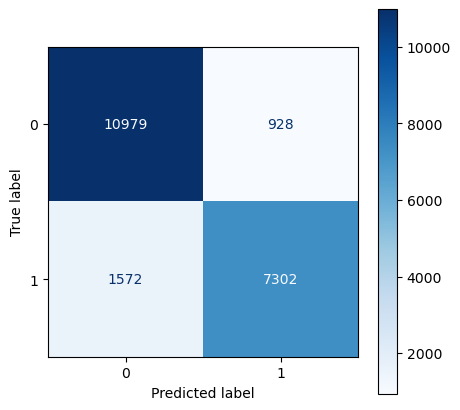

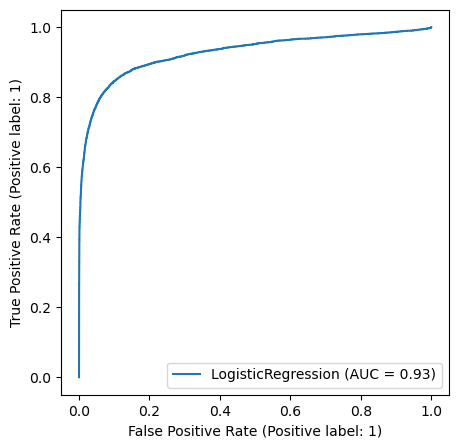

In [35]:
model_lr, train_lr, accuracy_lr, precision_lr, recall_lr, f1_lr, roc_lr, tt_lr = get_model_metrics(model_lr,x_train,x_val,y_train,y_val)

### Random forest <a id="11"></a> <br>

Performing grid search to obtain optimal model parameters.

In [35]:
max_depth = [5, 10, 20, 25]
min_samples_leaf = [1, 2, 3, 5]
min_samples_split = [1, 2, 3, 5]
n_estimators = [200, 500, 1000, 1200]
param_grid_rfc={"max_depth":max_depth,
            "min_samples_leaf":min_samples_leaf,
            "min_samples_split":min_samples_split,
            "n_estimators" : n_estimators
            }
model_grid_search_rfc = GridSearchCV(RandomForestClassifier(),param_grid = param_grid_rfc)

model_grid_search_rfc.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 20, 25],
                         'min_samples_leaf': [1, 2, 3, 5],
                         'min_samples_split': [1, 2, 3, 5],
                         'n_estimators': [200, 500, 1000, 1200]})

Printing the best parameters from the GridSearch.

In [36]:
rfc_params = model_grid_search_rfc.best_params_
print(rfc_params)

{'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 1000}


Executing the model.

In [36]:
# model_rfc = RandomForestClassifier(**rfc_params)
model_rfc = RandomForestClassifier(max_depth = 25, min_samples_leaf = 1, min_samples_split = 5, n_estimators = 1000)

Analysis of model performance based on different KPIs.

Accuracy on Training = 0.995
Accuracy on Test = 0.962 • Precision = 0.973
Recall = 0.937
F1 = 0.955 • ROC Area under Curve = 0.993


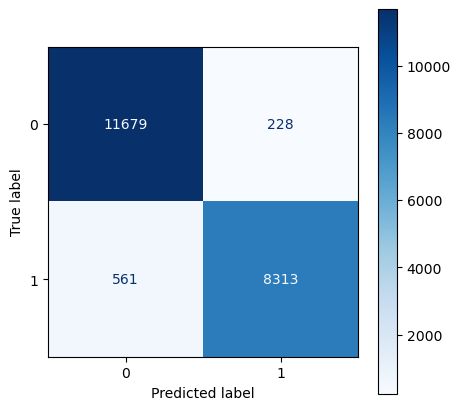

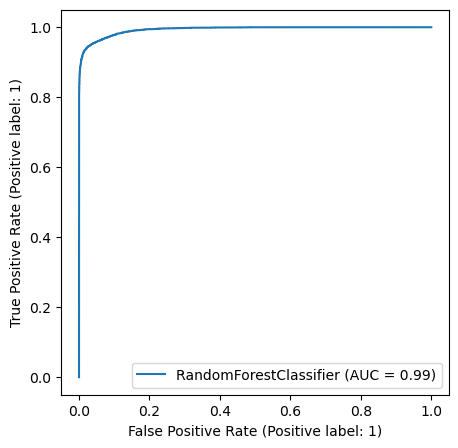

In [37]:
model_rfc, train_rfc, accuracy_rfc, precision_rfc, recall_rfc, f1_rfc, roc_rfc, tt_rfc = get_model_metrics(model_rfc, x_train, x_val, y_train, y_val)

### Adaptive Boosting Classifier (AdaBoost) <a id="12"></a> <br>

Performing grid search to obtain optimal model parameters.

In [40]:
n_estimators = [25, 50, 75, 100, 150, 200]
learning_rate = [0.01, 0.1, 0.2, 0.5, 0.8, 1.0]
base_estimator = DecisionTreeClassifier()
ada_boost = AdaBoostClassifier(base_estimator = base_estimator)
param_grid_abc = {"n_estimators":n_estimators,
            "learning_rate":learning_rate
            }

grid_search_abc = GridSearchCV(estimator=ada_boost, param_grid = param_grid_abc)
grid_search_abc.fit(x_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.5, 0.8, 1.0],
                         'n_estimators': [25, 50, 75, 100, 150, 200]})

Printing the best parameters from the GridSearch.

In [41]:
abc_params = grid_search_abc.best_params_
print(abc_params)

{'learning_rate': 0.8, 'n_estimators': 50}


Executing the model.

In [38]:
# model_abc = AdaBoostClassifier(**abc_params)
model_abc = AdaBoostClassifier(learning_rate = 0.8, n_estimators = 50)

Analysis of model performance based on different KPIs.

Accuracy on Training = 0.925
Accuracy on Test = 0.925 • Precision = 0.914
Recall = 0.911
F1 = 0.912 • ROC Area under Curve = 0.977


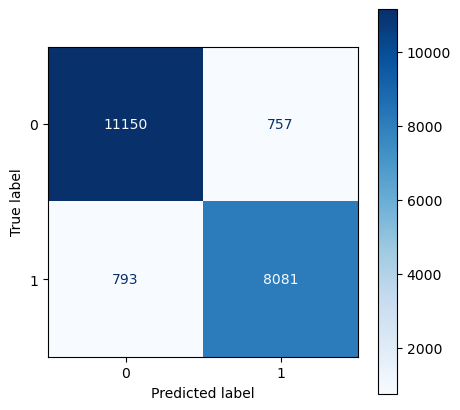

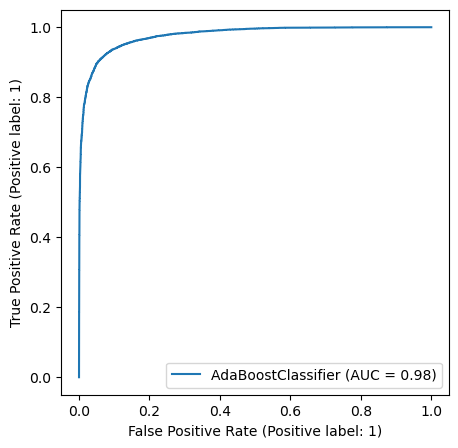

In [39]:
model_abc, train_abc, accuracy_abc, precision_abc, recall_abc, f1_abc, roc_abc, tt_abc = get_model_metrics(model_abc,x_train,x_val,y_train,y_val)

### Decision tree <a id="13"></a> <br>

Performing grid search to obtain optimal model parameters.

In [44]:
max_depth = [5, 10, 20, 25]
min_samples_leaf = [1, 2, 3, 5]
min_samples_split = [1, 2, 3, 5]
param_grid_dtc = {"max_depth":max_depth,
            "min_samples_leaf":min_samples_leaf,
            "min_samples_split":min_samples_split
            }
model_grid_search_dtc = GridSearchCV(DecisionTreeClassifier(), param_grid = param_grid_dtc)

model_grid_search_dtc.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 10, 20, 25],
                         'min_samples_leaf': [1, 2, 3, 5],
                         'min_samples_split': [1, 2, 3, 5]})

Printing the best parameters from the GridSearch.

In [45]:
dtc_params = model_grid_search_dtc.best_params_
print(dtc_params)

{'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 3}


Executing the model.

In [40]:
# model_dtc = DecisionTreeClassifier(**dtc_params)
model_dtc = DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=3)

Analysis of model performance based on different KPIs.

Accuracy on Training = 0.975
Accuracy on Test = 0.934 • Precision = 0.922
Recall = 0.923
F1 = 0.923 • ROC Area under Curve = 0.966


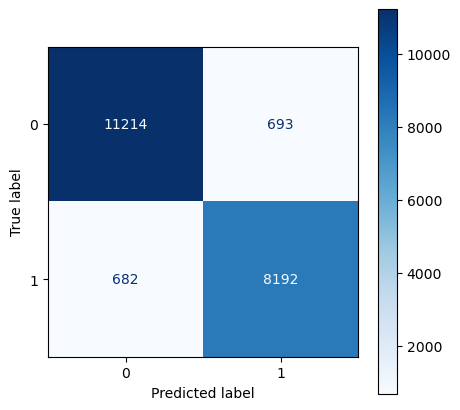

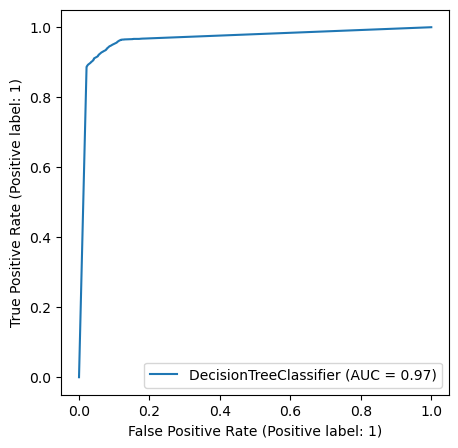

In [41]:
model_dtc, train_dtc, accuracy_dtc, precision_dtc, recall_dtc, f1_dtc, roc_dtc, tt_dtc = get_model_metrics(model_dtc, x_train, x_val, y_train, y_val)

### XGBoost <a id="14"></a> <br>

Performing grid search to obtain optimal model parameters.

In [48]:
n_estimators = [100, 200, 500, 1000]
learning_rate = [0.01, 0.1, 0.3, 0.5]
max_depth = [5, 10, 15, 20]
param_grid_xgbc = {"n_estimators":n_estimators,
            "learning_rate":learning_rate,
            "max_depth": max_depth
            }

model_grid_search_xgbc = GridSearchCV(XGBClassifier(), param_grid = param_grid_xgbc)
model_grid_search_xgbc.fit(x_train, y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_

Printing the best parameters from the GridSearch.

In [49]:
xgbc_params = model_grid_search_xgbc.best_params_
print(xgbc_params)

{'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 1000}


Executing the model.

In [44]:
# model_xgbc = XGBClassifier(**xgbc_params)
model_xgbc = XGBClassifier(learning_rate = 0.01, max_depth = 10, n_estimators = 1000)

Analysis of model performance based on different KPIs.

Accuracy on Training = 0.981
Accuracy on Test = 0.967 • Precision = 0.976
Recall = 0.945
F1 = 0.961 • ROC Area under Curve = 0.995


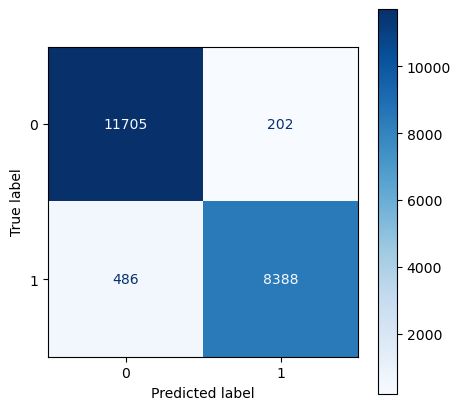

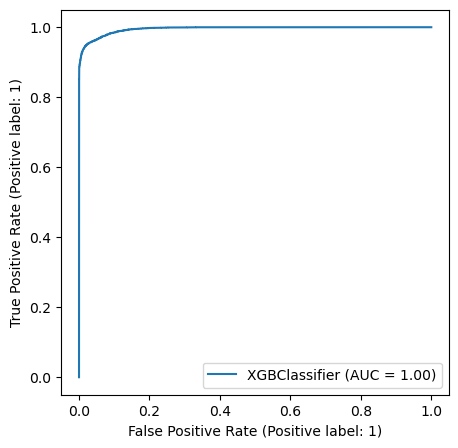

In [45]:
model_xgbc, train_xgbc, accuracy_xgbc, precision_xgbc, recall_xgbc, f1_xgbc, roc_xgbc, tt_xgbc = get_model_metrics(model_xgbc, x_train, x_val, y_train, y_val)

### KNN <a id="15"></a> <br>

Performing grid search to obtain optimal model parameters.

In [52]:
n_neighbors = [3, 5, 7, 9, 10]
weights = ['uniform', 'distance']
param_grid_knn = {"n_neighbors":n_neighbors,
            "weights":weights
            }

model_grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid_knn)
model_grid_search_knn.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 10],
                         'weights': ['uniform', 'distance']})

Printing the best parameters from the GridSearch.

In [53]:
knn_params = model_grid_search_knn.best_params_
print(knn_params)

{'n_neighbors': 10, 'weights': 'distance'}


Executing the model.

In [47]:
# model_knn = KNeighborsClassifier(**knn_params)
model_knn = KNeighborsClassifier(n_neighbors = 10, weights = 'distance')

Analysis of model performance based on different KPIs.

Accuracy on Training = 1.000
Accuracy on Test = 0.933 • Precision = 0.965
Recall = 0.876
F1 = 0.918 • ROC Area under Curve = 0.978


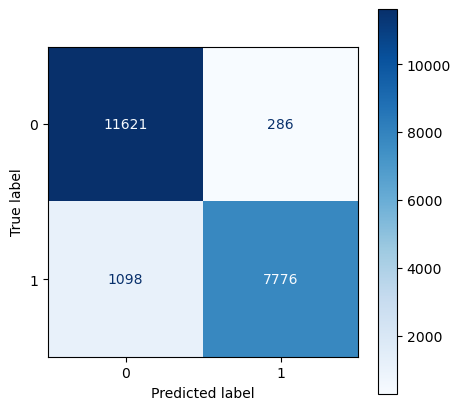

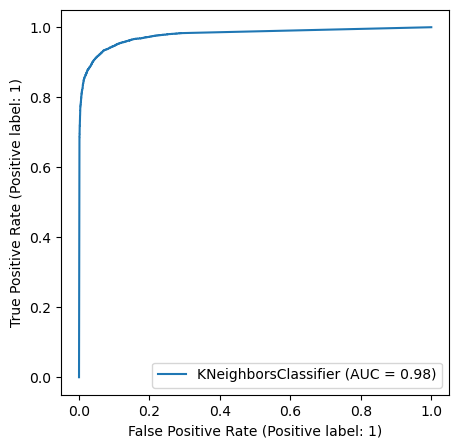

In [48]:
model_knn, train_knn, accuracy_knn, precision_knn, recall_knn, f1_knn, roc_knn, tt_knn = get_model_metrics(model_knn, x_train, x_val, y_train, y_val)

### Support Vector Classifier (SVC) <a id="16"></a> <br>

Performing grid search to obtain optimal model parameters.

In [56]:
C = [0.1, 1, 10]
kernel = ['poly', 'rbf', 'sigmoid']
gamma = ['scale', 'auto']
param_grid_svc = {"C":C,
            "kernel":kernel,
            "gamma":gamma
            }

model_grid_search_svc = GridSearchCV(SVC(), param_grid = param_grid_svc)
model_grid_search_svc.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'rbf', 'sigmoid']})

Printing the best parameters from the GridSearch.

In [57]:
svc_params = model_grid_search_svc.best_params_
print(svc_params)

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


Executing the model.

In [51]:
# model_svc = SVC(**svc_params, probability = True)
model_svc = SVC(C = 10, gamma= 'scale', kernel = 'rbf', probability = True)

Analysis of model performance based on different KPIs.

Accuracy on Training = 0.962
Accuracy on Test = 0.960 • Precision = 0.968
Recall = 0.937
F1 = 0.952 • ROC Area under Curve = 0.990


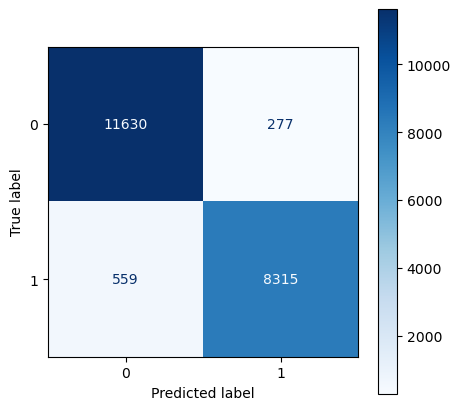

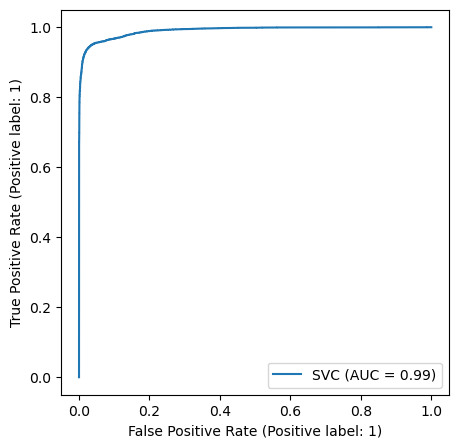

In [52]:
model_svc, train_svc, accuracy_svc, precision_svc, recall_svc, f1_svc, roc_svc, tt_svc = get_model_metrics(model_svc, x_train, x_val, y_train, y_val)

### LGBM Classifier <a id="17"></a> <br>

Performing grid search to obtain optimal model parameters.

In [75]:
num_leaves = [31, 63, 127]
learning_rate = [0.1, 0.3, 0.5]
n_estimators = [100, 200, 300]
param_grid_lgbm = {"num_leaves":num_leaves,
            "learning_rate":learning_rate,
            "n_estimators":n_estimators,
            "verbose" : [-1]
            }

model_grid_search_lgbm = GridSearchCV(LGBMClassifier(), param_grid = param_grid_lgbm)
model_grid_search_lgbm.fit(x_train, y_train)

GridSearchCV(estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.1, 0.3, 0.5],
                         'n_estimators': [100, 200, 300],
                         'num_leaves': [31, 63, 127], 'verbose': [-1]})

Printing the best parameters from the GridSearch.

In [76]:
lgbm_params = model_grid_search_lgbm.best_params_
print(lgbm_params)

{'learning_rate': 0.1, 'n_estimators': 100, 'num_leaves': 63, 'verbose': -1}


Executing the model.

In [53]:
# model_lgbm = LGBMClassifier(**lgbm_params)
model_lgbm = LGBMClassifier(learning_rate = 0.1, n_estimators = 100, num_leaves = 63, verbose = -1)

Analysis of model performance based on different KPIs.

Accuracy on Training = 0.972
Accuracy on Test = 0.963 • Precision = 0.973
Recall = 0.939
F1 = 0.956 • ROC Area under Curve = 0.995


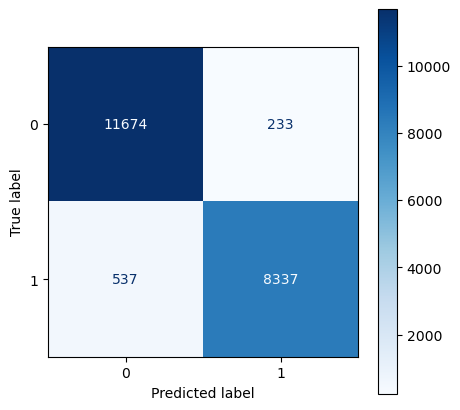

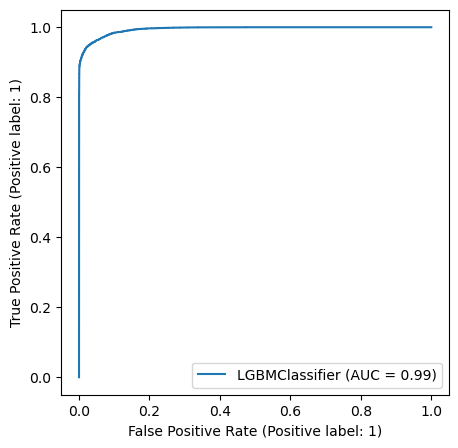

In [54]:
model_lgbm, train_lgbm, accuracy_lgbm, precision_lgbm, recall_lgbm, f1_lgbm, roc_lgbm, tt_lgbm = get_model_metrics(model_lgbm, x_train, x_val, y_train, y_val)

## Comparing the model performance <a id="18"></a> <br>

In [55]:
# Collecting model data
training_scores = [train_lr, train_rfc, train_abc, train_dtc, train_xgbc, train_knn, train_svc, train_lgbm]
accuracy = [accuracy_lr, accuracy_rfc, accuracy_abc, accuracy_dtc, accuracy_xgbc, accuracy_knn,accuracy_svc,accuracy_lgbm]
precision = [precision_lr, precision_rfc, precision_abc, precision_dtc, precision_xgbc, precision_knn, precision_svc, precision_lgbm]
recall = [recall_lr, recall_rfc, recall_abc, recall_dtc, recall_xgbc, recall_knn, recall_svc, recall_lgbm]
f1_scores = [f1_lr,  f1_rfc, f1_abc, f1_dtc, f1_xgbc, f1_knn, f1_svc, f1_lgbm]
roc_scores = [roc_lr, roc_rfc, roc_abc, roc_dtc, roc_xgbc, roc_knn, roc_svc, roc_lgbm]
time_scores = [tt_lr, tt_rfc, tt_abc, tt_dtc, tt_xgbc, tt_knn, tt_svc, tt_lgbm]

model_data = {'Model': ['Logistic Regression', 'Random Forest', 'AdaBoost',
                       'Decision Tree', 'XGBBoost', 'KNN', 'Support Vector Classifier', 'LGBM'],
            'Accuracy on Training' : training_scores,
            'Accuracy on Validation' : accuracy,
            'Precision' : precision,
            'Recall' : recall,
            'F1' : f1_scores,
            'ROC AUC Score' : roc_scores,
            'Time Elapsed (seconds)' : time_scores}

model_data = pd.DataFrame(model_data)

In [56]:
model_data

,Model,Accuracy on Training,Accuracy on Validation,Precision,Recall,F1,ROC AUC Score,Time Elapsed (seconds)
0,Logistic Regression,0.873429,0.879698,0.887242,0.822853,0.853835,0.927730,1.624448
1,Random Forest,0.995404,0.962033,0.973305,0.936782,0.954694,0.993388,215.647630
2,AdaBoost,0.925051,0.925413,0.914347,0.910638,0.912489,0.976625,6.041842
3,Decision Tree,0.975193,0.933834,0.922003,0.923146,0.922574,0.965819,0.647106
4,XGBBoost,0.981100,0.966893,0.976484,0.945233,0.960605,0.995200,123.161122
5,KNN,1.000000,0.933401,0.964525,0.876268,0.918281,0.977732,282.999469
6,Support Vector Classifier,0.961731,0.959771,0.967761,0.937007,0.952136,0.990458,1697.232045
7,LGBM,0.972294,0.962947,0.972812,0.939486,0.955859,0.994527,2.512716


Plotting model's performance metrics

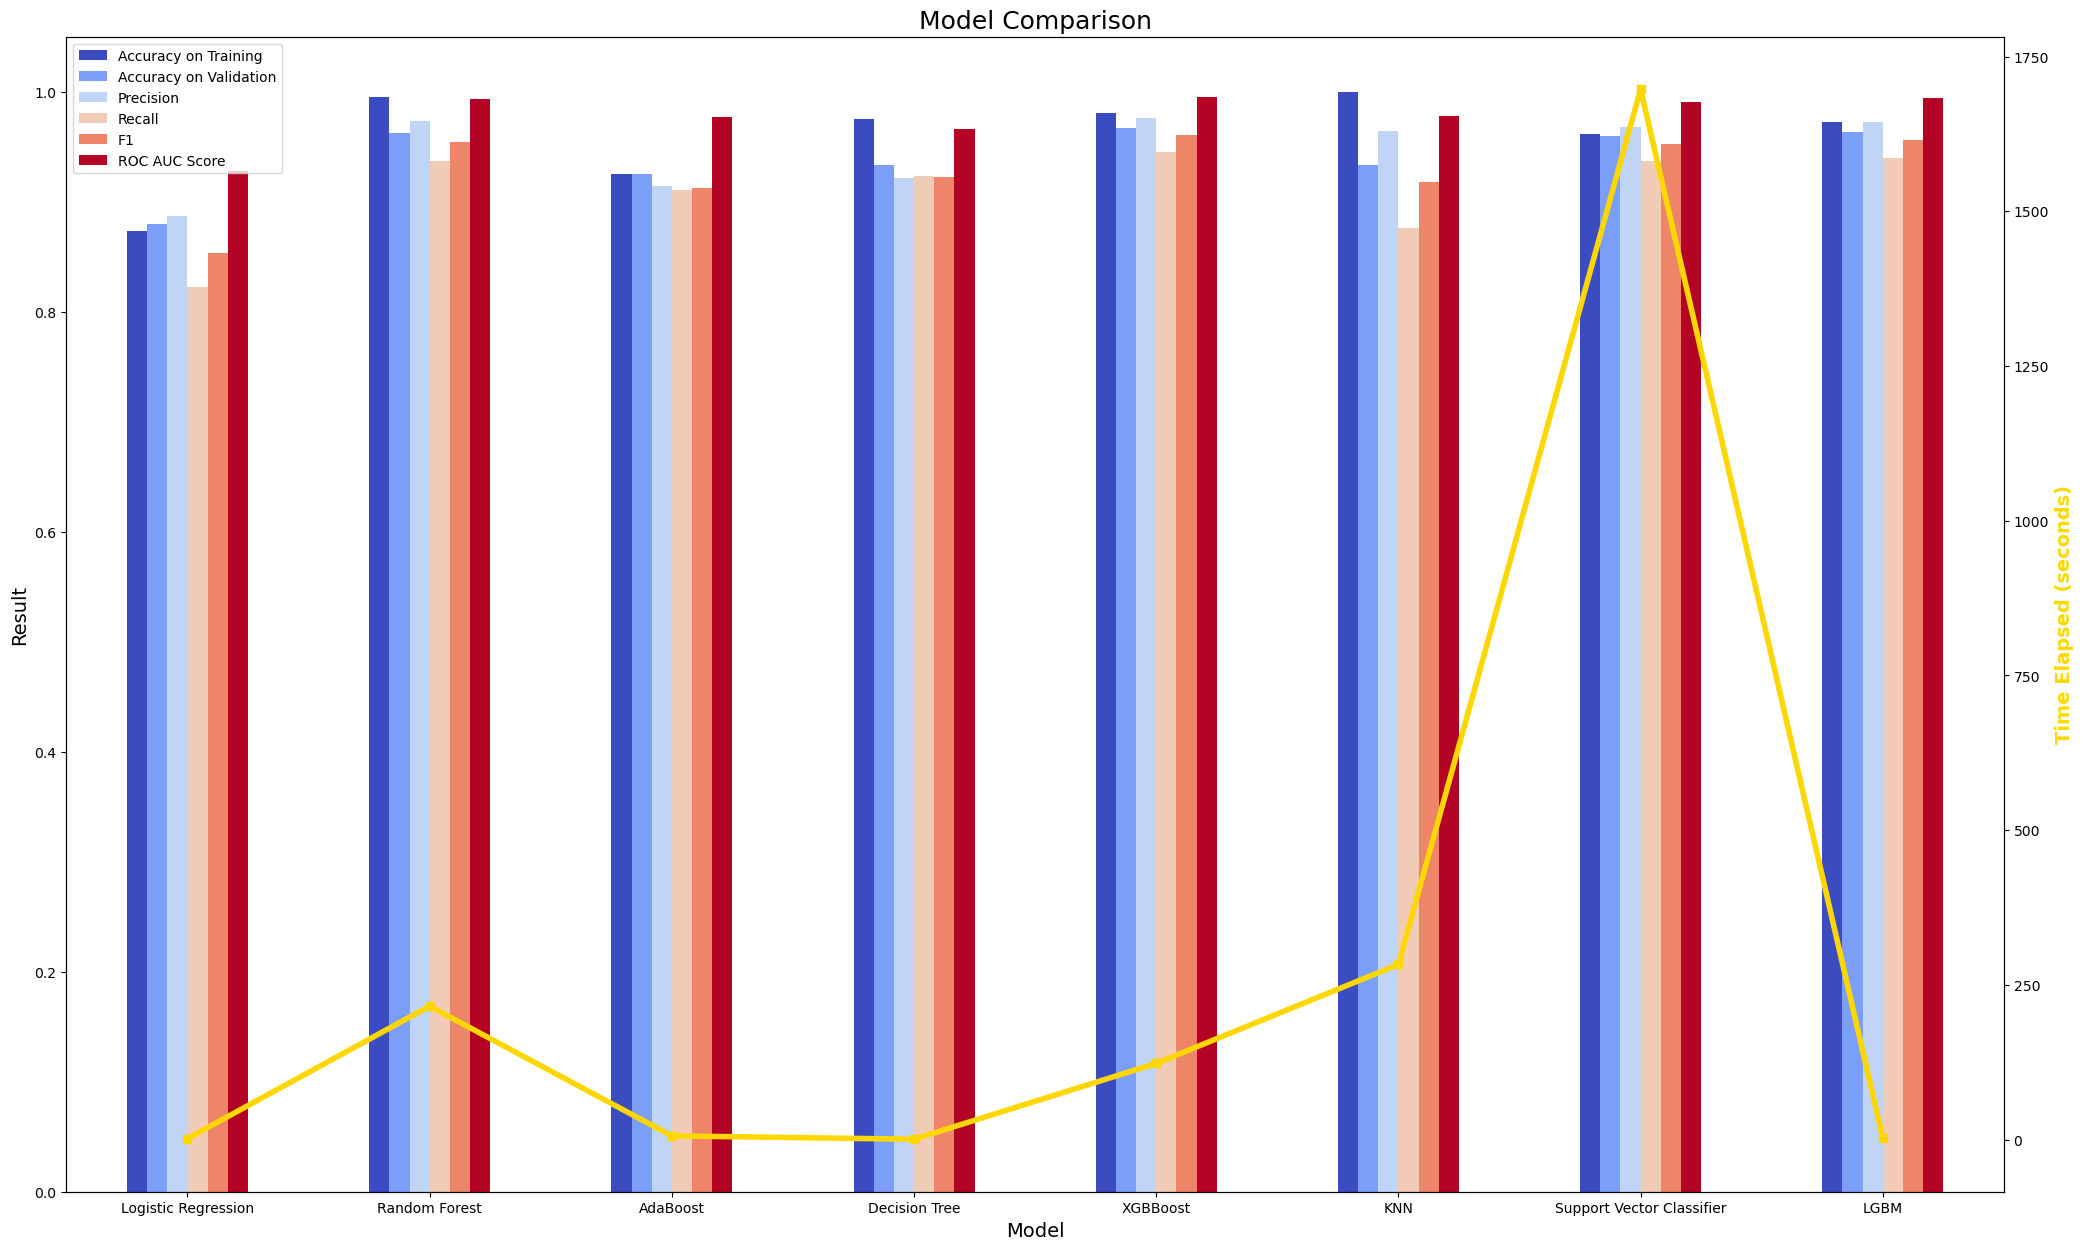

In [59]:
# Plotting each model's performance scores
plt.rcParams["figure.figsize"] = (25,15)

ax1 = model_data.plot.bar(x = 'Model', y = ["Accuracy on Training", "Accuracy on Validation", "Precision", "Recall",
                                           "F1", "ROC AUC Score"], 
                          cmap = 'coolwarm')
ax2 = model_data['Time Elapsed (seconds)'].plot(secondary_y = True, color = 'Gold', linewidth = 4, marker = 's')
ax1.legend()

ax1.set_title("Model Comparison", fontsize = 18)
ax1.set_xlabel('Model', fontsize = 14)
ax1.set_ylabel('Result', fontsize = 14, color = 'Black')
ax2.set_ylabel('Time Elapsed (seconds)', fontsize = 14, color = 'Gold', fontweight = 'bold');

At this point would recommend to a client XGBoost algorithm. Although the model had not performed the most efficiently, it did have the most effective performance as it is much faster than the rest of the algorithms applied.

### Executing the algorithm on the test dataset <a id="19"></a> <br>

In [60]:
y_test_prob = model_xgbc.predict(x_test)

In [61]:
accuracy = accuracy_score(y_test, y_test_prob)
precision = precision_score(y_test, y_test_prob)
recall = recall_score(y_test, y_test_prob)
f1 = f1_score(y_test, y_test_prob)
roc = roc_auc_score(y_test, y_test_prob)

print("Test Accuracy: {:.3f}".format(accuracy))
print("Test Precision: {:.3f}".format(precision))
print("Test Recall: {:.3f}".format(recall))
print("Test F1: {:.3f}".format(f1))
print("Test ROC: {:.3f}".format(roc))

Test Accuracy: 0.964
Test Precision: 0.973
Test Recall: 0.944
Test F1: 0.958
Test ROC: 0.962


## Packaging the model <a id="20"></a> <br>

Saving the best three models with pickle

In [62]:
models_pickled = [model_xgbc, model_rfc, model_lgbm]
filename = "models.pkl"

# Save the model to the pickle file
with open(filename, 'wb') as file:
    pickle.dump([model for model in models_pickled], file)

### Model Explainability using SHAP <a id="21"></a> <br>

In [91]:
features = [col for col in airplane_traindata.columns]
features.remove('satisfaction')

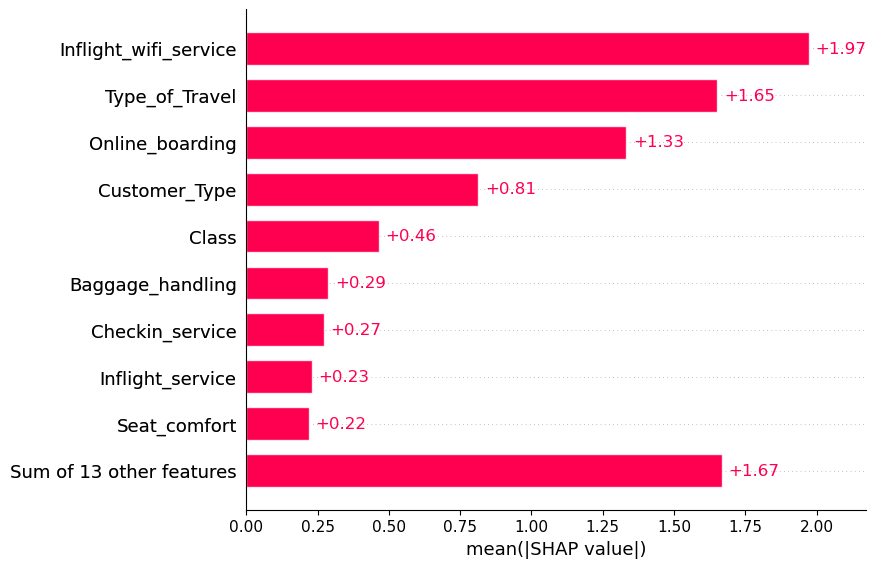

In [78]:
explainer = shap.Explainer(model_xgbc, feature_names = features)
shap_values = explainer(x_train)
shap.plots.bar(shap_values)

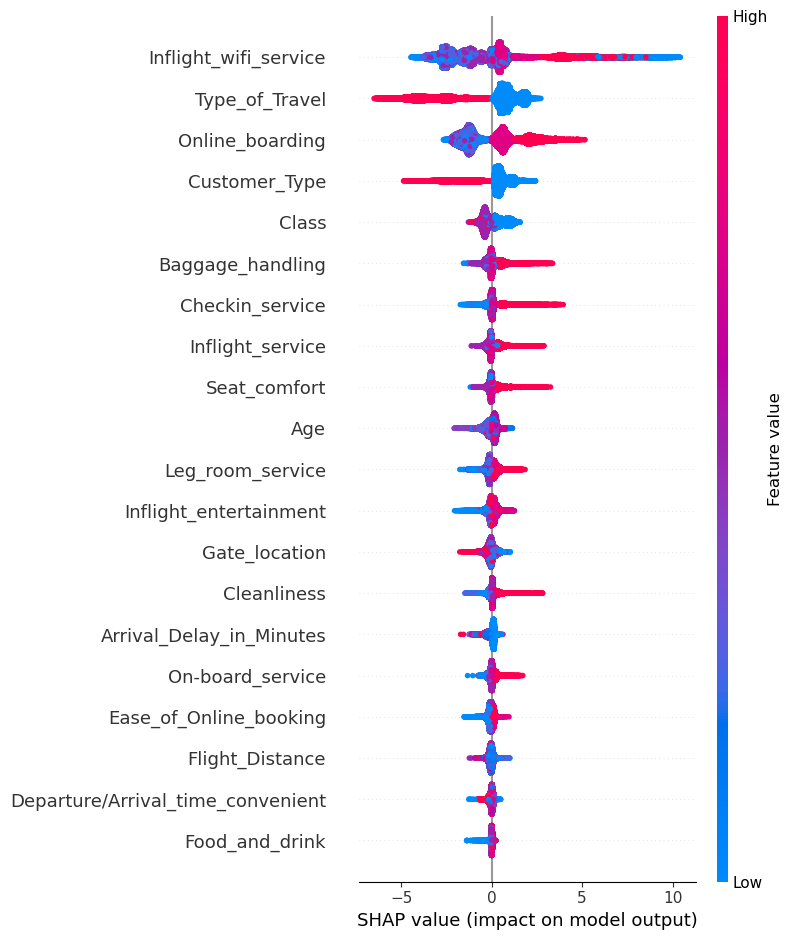

In [87]:
shap.summary_plot(shap_values, x_train, class_names=model_xgbc.classes_)

Considering the mean SHAP value as metric for feature importance, we can observe that in-flight wi-fi service is the most impactful feature of our data, followed closely by travel type and online boarding.

The SHAP summary plot  provides a more informative illustration of the feature value of each individual observation in the data and its impact on the model output. The features are also ordered by their impact on prediction, but it also shows us how higher and lower values of each individual observation of a feature will affect the result

## Conclusion <a id="22"></a> <br>

As I was working with a binary classification problem, I wanted to make sure that I trained and tested models best suited for that task. I also made sure to include models that were specifically tailored for effective classification using discrete categorical data.

The model pipelines that I trained were a Logistic Regression model, an Adaptive Boost classifier, a Random Forest classifier, a Decision Tree classification  model, KNN classification model, Support Vector Classifier, Light Gradient Boosting model and an Extreme Gradient Boosting classifier (XGBoost). I compared all pipelines on their training accuracy and test accuracy, precision, recall, and ROC value.

Before executing the model I also conducted a Grid Search in order to find the ideal parameter optimizations for the model.

The model that I selected for executing on the test data is the XG Boost model. This model ultimately performed really well— showing high performance in both training and validation. The model output an accuracy (validation) of 97, a ROC value of almost 100, a Precision of 98, and a Recall of 95.

The model also showed great performance on the test data with accuracy of 96, precision of 97, recall of 94 and F1 score of 96.

As per the analysis made the factors which have greatest impact on the customers' satisfaction are in-flight wi-fi services, travel type and online boarding.

## References <a id="23"></a> <br>

Airline Passenger Satisfaction Dataset (Kaggle): https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction  
https://medium.com/@chris.bacani7/explaining-airline-passenger-satisfaction-using-interpretable-machine-learning-88d29aa55677   
https://kimsangaha.medium.com/airlines-customer-satisfaction-analysis-eda-machine-learning-algorithms-dd3b883a3a38   
https://github.com/rk326439/Airline_satisfaction_ML_DL/blob/main/RAJ_KUMAR_ML_DL_Airline_services.ipynb  
https://github.com/yogeshwaran-shanmuganathan/Airline-Passenger-Satisfaction/blob/master/Code/airline_passenger_satisfaction.ipynb  
https://github.com/chrisbacani/Udacity-Data-Scientist-Capstone/blob/b28044f52f04e688df646d63f0da94768b605261/Customer-Satisfaction-Workspace.ipynb  
https://www.kaggle.com/code/amandamagzal/airline-passenger-satisfaction-analysis#2-Data-Visualization-   
https://www.kaggle.com/code/frixinglife/airline-passenger-satisfaction-part-1    
https://www.kaggle.com/code/rajeevnair676/airline-satisfaction-xgboost-96-accuracy
